In [6]:
import sqlite3
import pandas as pd
import soccerdata as sd
from pathlib import PosixPath
import plotly.express as px

In [7]:
from database_io.db_handler import DB_handler

In [8]:
db_handler = DB_handler("/home/morten/Develop/packing-report/gde/GDE.db")

In [10]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("/home/morten/Develop/packing-report/gde/GDE.db")

# Execute SQL query and load results into a DataFrame
df = pd.read_sql_query("SELECT * FROM games", conn)

In [9]:
ws = sd.WhoScored(
    #  "GER-Bundesliga", "GER-Bundesliga2", "ENG-Premier League", "ESP-La Liga", "FRA-Ligue 1", "ITA-Serie A"
    leagues=["ENG-Premier League"],
    seasons=[16],
    no_cache=False,
    no_store=False,
    data_dir=PosixPath("/home/morten/Develop/Open-Data/soccerdata"),
    path_to_browser="/usr/bin/chromium",
    headless=True,
)

[04/15/24 15:41:25] INFO     Saving cached data to /home/morten/Develop/Open-Data/soccerdata          ]8;id=950112;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=859585;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_common.py#91\91]8;;\

Starting ChromeDriver in headless mode. 4.11.2


[04/15/24 15:41:26] INFO     patching driver executable                                              ]8;id=569622;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/undetected_chromedriver/patcher.py\patcher.py]8;;\:]8;id=641735;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/undetected_chromedriver/patcher.py#346\346]8;;\
                             /home/morten/.local/share/undetected_chromedriver/undetected_chromedriv               
                             er                                                                                    

In [ ]:
events = ws.read_events(match_id=[1080506])
loader = ws.read_events(match_id=[1080506], output_fmt='loader')
loader_players_df = loader.players(1080506)
df_teams = loader.teams(game_id=1080506)

In [11]:
events

NameError: name 'events' is not defined

In [12]:
def is_own_goal(qualifiers):
    return [max([(True if x["type"]["displayName"] == "OwnGoal" else False) for x in events], default=False) for events in qualifiers]

def get_opposition_team(df_goals: pd.DataFrame, df_teams: pd.DataFrame):
    switched_teams = df_goals.copy()
    team_id_one = df_teams["team_id"].unique()[0]
    team_id_two = df_teams["team_id"].unique()[1]
    switched_teams.replace({team_id_one : team_id_two,
                            team_id_two : team_id_one}, inplace = True)
    return switched_teams

def get_score(events_df: pd.DataFrame, df_teams: pd.DataFrame):
    goals = events_df.loc[(events_df["is_goal"] == True)].copy()
    goals["own_goal"] = is_own_goal(goals["qualifiers"])
    goals.loc[~goals["own_goal"], "goal_team_id"] = goals.loc[~goals["own_goal"],"team_id"]
    goals.loc[goals["own_goal"], "goal_team_id"] = get_opposition_team(goals["team_id"], df_teams)[goals["own_goal"]]
    goals.reset_index(inplace=True)
    return goals[["expanded_minute", "goal_team_id"]]

In [13]:
get_score(events, df_teams).sort_values(by="expanded_minute")

NameError: name 'events' is not defined

In [14]:
from gde_utils.date_utils import to_datetime
from datetime import date
from game.game_timeline import GameTimeline

In [15]:
# date = date(2016, 8, 14)
# game_timeline = GameTimeline(ws, 1080506, date, "ENG-Premier League", db_handler)
# game_timeline.handle()

In [16]:
df

,game_id,player_id,minutes,starter,opposition_team_id,result,elo,opposition_elo,game_date,team_id,expected_game_result,roundend_expected_game_result,league,version
0,1090815,57005,91,1,110,0-4,1467.369595,1458.234784,2016-08-05,43,0.116697,0.0,GER-Bundesliga2,0.1
1,1090815,124021,91,1,110,0-4,1467.369595,1458.234784,2016-08-05,43,0.116697,0.0,GER-Bundesliga2,0.1
2,1090815,111742,91,1,110,0-4,1467.369595,1458.234784,2016-08-05,43,0.116697,0.0,GER-Bundesliga2,0.1
3,1090815,133892,91,1,110,0-4,1467.369595,1458.234784,2016-08-05,43,0.116697,0.0,GER-Bundesliga2,0.1
4,1090815,132037,91,1,110,0-4,1467.369595,1458.234784,2016-08-05,43,0.116697,0.0,GER-Bundesliga2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165884,1549915,363676,25,0,14,1-3,1576.020392,1619.145485,2022-05-22,18,-0.170483,0.0,ENG-Premier League,0.1
165885,1549915,299451,20,0,18,2-1,1540.857082,1542.778001,2022-05-22,14,0.139220,0.0,ENG-Premier League,0.1
165886,1549915,243552,15,0,18,1-0,1578.992357,1544.167335,2022-05-22,14,0.190656,0.0,ENG-Premier League,0.1
165887,1549915,13798,14,0,14,0-1,1624.618392,1613.052734,2022-05-22,18,-0.082286,0.0,ENG-Premier League,0.1


In [17]:
px.scatter(df.groupby("game_date").aggregate({"elo": "mean", "opposition_elo": "mean"}).reset_index(), x="game_date", y="elo")

<AxesSubplot:>

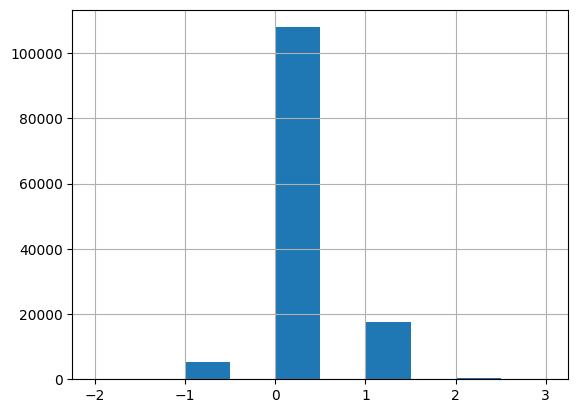

In [18]:
df[df["starter"] == 1].roundend_expected_game_result.hist()

In [19]:
df

,game_id,player_id,minutes,starter,opposition_team_id,result,elo,opposition_elo,game_date,team_id,expected_game_result,roundend_expected_game_result,league,version
0,1090815,57005,91,1,110,0-4,1467.369595,1458.234784,2016-08-05,43,0.116697,0.0,GER-Bundesliga2,0.1
1,1090815,124021,91,1,110,0-4,1467.369595,1458.234784,2016-08-05,43,0.116697,0.0,GER-Bundesliga2,0.1
2,1090815,111742,91,1,110,0-4,1467.369595,1458.234784,2016-08-05,43,0.116697,0.0,GER-Bundesliga2,0.1
3,1090815,133892,91,1,110,0-4,1467.369595,1458.234784,2016-08-05,43,0.116697,0.0,GER-Bundesliga2,0.1
4,1090815,132037,91,1,110,0-4,1467.369595,1458.234784,2016-08-05,43,0.116697,0.0,GER-Bundesliga2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165884,1549915,363676,25,0,14,1-3,1576.020392,1619.145485,2022-05-22,18,-0.170483,0.0,ENG-Premier League,0.1
165885,1549915,299451,20,0,18,2-1,1540.857082,1542.778001,2022-05-22,14,0.139220,0.0,ENG-Premier League,0.1
165886,1549915,243552,15,0,18,1-0,1578.992357,1544.167335,2022-05-22,14,0.190656,0.0,ENG-Premier League,0.1
165887,1549915,13798,14,0,14,0-1,1624.618392,1613.052734,2022-05-22,18,-0.082286,0.0,ENG-Premier League,0.1


<AxesSubplot:>

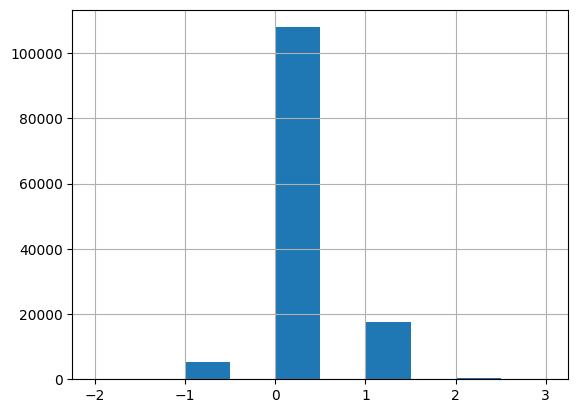

In [20]:
df[df["starter"] == 1].roundend_expected_game_result.hist()